# **MOVIE RECOMENDATION PROJECT** 
## *By : Zacky Faishal Abror*

# **Data Understanding**

## import library

In [19]:
# melakukan importing library pandas dan matplotlib untuk data understanding
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## load dataset

In [20]:
#load csv file
movies = pd.read_csv(r"datasets/movies.csv")
ratings = pd.read_csv(r"datasets/ratings.csv")


Periksa Head dari dataset yang dimuat

In [21]:
print(movies.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [22]:
print(ratings.head())

   userId  movieId  rating   timestamp
0       1      296     5.0  1147880044
1       1      306     3.5  1147868817
2       1      307     5.0  1147868828
3       1      665     5.0  1147878820
4       1      899     3.5  1147868510


Periksa Ukuran Dataset dari masing masing dataframe

In [23]:

print('Jumlah Ukuran Dataset:', movies.shape)


Jumlah Ukuran Dataset: (62423, 3)


In [24]:
print('Jumlah Ukuran Dataset:', ratings.shape)

Jumlah Ukuran Dataset: (25000095, 4)


 
# Deskripsi Dataset
 
 Dataset yang digunakan dalam proyek ini adalah **Movie Recommendation System Dataset**. Dataset ini berisi data film dan rating yang diberikan oleh pengguna, yang sangat relevan untuk membangun **recommender system**. Data ini mencerminkan interaksi pengguna terhadap berbagai film, menjadikannya cocok untuk penelitian dan pengembangan sistem rekomendasi film.
 
---

## **Deskripsi Variabel**

### movies.csv

| Column Name | Description |
| :---------- | :----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `movieId` | **ID Film**: Nomor unik yang ditetapkan untuk setiap film. (Numerik) |
| `title` | **Judul Film**: Judul film beserta tahun rilisnya. (Nominal) |
| `genres` | **Genre**: Kategori genre film, dipisahkan oleh karakter `|`. (Nominal) |

### ratings.csv
 
| Column Name | Description |
| :---------- | :----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `userId` | **ID Pengguna**: Nomor unik yang ditetapkan untuk setiap pengguna. (Numerik) |
| `movieId` | **ID Film**: Nomor unik yang ditetapkan untuk setiap film yang diberi rating. (Numerik) |
| `rating` | **Rating**: Rating yang diberikan oleh pengguna kepada film, dalam skala tertentu (misalnya 0.5 hingga 5.0). (Numerik) |
| `timestamp` | **Stempel Waktu**: Waktu ketika rating dibuat. (Numerik, biasanya dalam format

# **CEK DATASET**

Cek Struktur dan Tipe Data pada dataset

In [25]:
print(movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB
None


In [26]:
print(ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB
None


Cek Missing Value

In [27]:
# Cek missing values
print(movies.isnull().sum())

movieId    0
title      0
genres     0
dtype: int64


In [28]:
# Cek missing values
print(ratings.isnull().sum())

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


Cek Nilai Unik

In [29]:
print(movies.nunique())


movieId    62423
title      62325
genres      1639
dtype: int64


In [30]:
print(ratings.nunique())

userId         162541
movieId         59047
rating             10
timestamp    20115267
dtype: int64


Cek Duplikasi

In [31]:
print('\nDuplicate Data on Movies datasets:', movies.duplicated().sum())


Duplicate Data on Movies datasets: 0


In [32]:
print('\nDuplicate Data on Ratings datasets:', ratings.duplicated().sum())


Duplicate Data on Ratings datasets: 0


# **Cleansing Data**

Data yang dimiliki oleh dataset ini sudah baik dan bagus, dimulai dari tidak adanya missing value, dan tidak ada duplikasi data. Sehingga tidak diperlukan proses cleansing data

# **Exploratory Data Analysis**

langkah selanjutnya dalam pipeline machine learning adalah melakukan **Exploratory Data Analysis (EDA)**. EDA bertujuan untuk memahami struktur, karakteristik, dan hubungan antar variabel dalam dataset yang akan digunakan.

### Statistik Deskriptif

In [33]:
print("--- Statistik Deskriptif ---")
print("\nStatistik Deskriptif untuk 'movies' dataset:")
print(movies.describe(include='all'))
print("\nStatistik Deskriptif untuk 'ratings' dataset:")
print(ratings.describe(include='all'))

--- Statistik Deskriptif ---

Statistik Deskriptif untuk 'movies' dataset:
              movieId            title genres
count    62423.000000            62423  62423
unique            NaN            62325   1639
top               NaN  The Void (2016)  Drama
freq              NaN                2   9056
mean    122220.387646              NaN    NaN
std      63264.744844              NaN    NaN
min          1.000000              NaN    NaN
25%      82146.500000              NaN    NaN
50%     138022.000000              NaN    NaN
75%     173222.000000              NaN    NaN
max     209171.000000              NaN    NaN

Statistik Deskriptif untuk 'ratings' dataset:
             userId       movieId        rating     timestamp
count  2.500010e+07  2.500010e+07  2.500010e+07  2.500010e+07
mean   8.118928e+04  2.138798e+04  3.533854e+00  1.215601e+09
std    4.679172e+04  3.919886e+04  1.060744e+00  2.268758e+08
min    1.000000e+00  1.000000e+00  5.000000e-01  7.896520e+08
25%    4.051000e

#### EDA UNTUK MOVIES

Analisis Genre


Jumlah Film per Genre (Potensi Fitur Content-Based):
genres
Drama                 25606
Comedy                16870
Thriller               8654
Romance                7719
Action                 7348
Horror                 5989
Documentary            5605
Crime                  5319
(no genres listed)     5062
Adventure              4145
Sci-Fi                 3595
Children               2935
Animation              2929
Mystery                2925
Fantasy                2731
War                    1874
Western                1399
Musical                1054
Film-Noir               353
IMAX                    195
Name: count, dtype: int64


C:\Users\faish\AppData\Local\Temp\ipykernel_12804\1675315746.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='Paired')


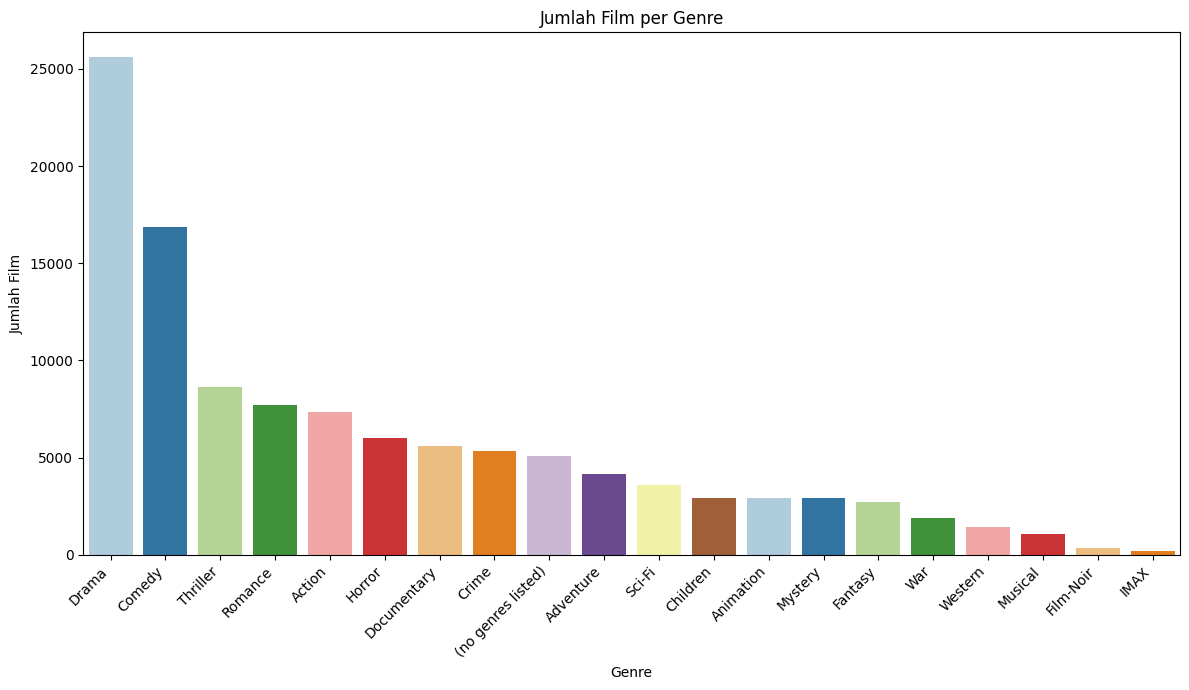

In [17]:
# 1. Analisis Genre: Penting untuk Content-Based Filtering
# Memecah string genre menjadi list dan memperluasnya ke baris terpisah
genres_exploded = movies['genres'].str.split('|').explode()

# Menghitung frekuensi setiap genre
genre_counts = genres_exploded.value_counts()
print("\nJumlah Film per Genre (Potensi Fitur Content-Based):")
print(genre_counts)

plt.figure(figsize=(12, 7))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='Paired')
plt.title('Jumlah Film per Genre')
plt.xlabel('Genre')
plt.ylabel('Jumlah Film')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Analisis Tahun Rilis Film


Statistik Deskriptif untuk Tahun Rilis Film:
count    62013.000000
mean      1992.044700
std         25.364884
min       1874.000000
25%       1976.000000
50%       2002.000000
75%       2012.000000
max       2019.000000
Name: release_year, dtype: float64


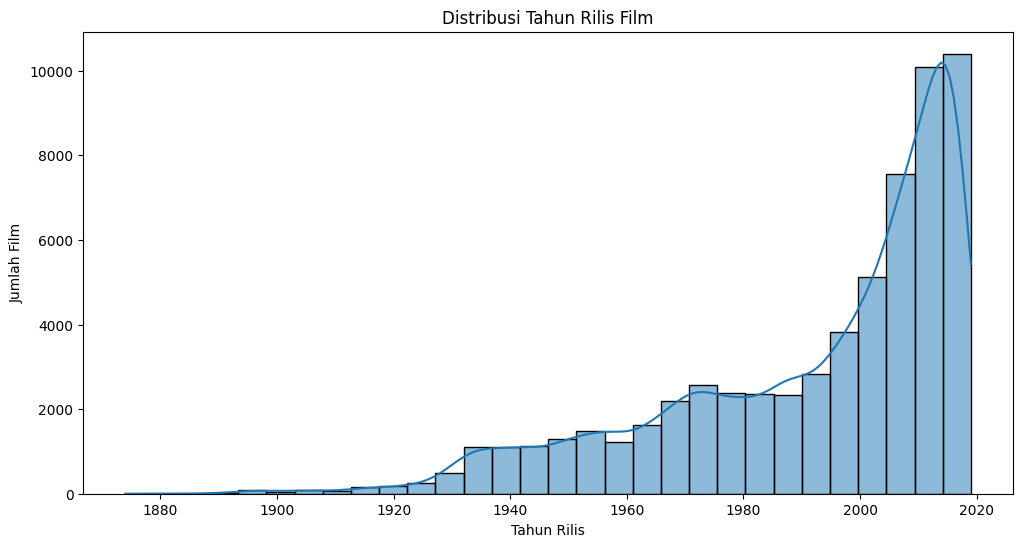


Film dengan tahun rilis yang tidak biasa (misal sebelum 1900 atau setelah 2025):
       movieId                                              title  \
15650    82337  Four Heads Are Better Than One (Un homme de tê...   
15655    82362  Pyramid of Triboulet, The (La pyramide de Trib...   
16842    88674      Edison Kinetoscopic Record of a Sneeze (1894)   
18075    94431                      Ella Lola, a la Trilby (1898)   
18988    98981                     Arrival of a Train, The (1896)   
...        ...                                                ...   
61822   206975                     The Mysterious Portrait (1899)   
62369   208917                         Caicedo (with Pole) (1894)   
62370   208919                           Indian Day School (1898)   
62371   208921                               A Street Arab (1898)   
62393   209067  Sousse: Marché aux charbons (avec chameaux) (1...   

                   genres  release_year  
15650             Fantasy        1898.0  
15655

In [34]:
movies['release_year'] = movies['title'].str.extract(r'\((\d{4})\)').astype(float)

print("\nStatistik Deskriptif untuk Tahun Rilis Film:")
print(movies['release_year'].describe())

plt.figure(figsize=(12, 6))
sns.histplot(movies['release_year'].dropna(), bins=30, kde=True)
plt.title('Distribusi Tahun Rilis Film')
plt.xlabel('Tahun Rilis')
plt.ylabel('Jumlah Film')
plt.show()

# Jika ada film dengan tahun yang tidak valid, ini perlu diperhatikan untuk pembersihan data lebih lanjut
# Contoh: Film dengan tahun rilis di masa depan atau terlalu lampau yang tidak masuk akal.
print("\nFilm dengan tahun rilis yang tidak biasa (misal sebelum 1900 atau setelah 2025):")
print(movies[(movies['release_year'] < 1900) | (movies['release_year'] > 2025)])

In [35]:
no_genres_listed = movies[movies['genres'] == '(no genres listed)']
print(f"\nJumlah film dengan '(no genres listed)': {len(no_genres_listed)}")
if not no_genres_listed.empty:
    print("Contoh film dengan '(no genres listed)':")
    print(no_genres_listed.head())


Jumlah film dengan '(no genres listed)': 5062
Contoh film dengan '(no genres listed)':
       movieId                                            title  \
15881    83773            Away with Words (San tiao ren) (1999)   
16060    84768                                Glitterbug (1994)   
16351    86493  Age of the Earth, The (A Idade da Terra) (1980)   
16491    87061                          Trails (Veredas) (1978)   
17404    91246                         Milky Way (Tejút) (2007)   

                   genres  release_year  
15881  (no genres listed)        1999.0  
16060  (no genres listed)        1994.0  
16351  (no genres listed)        1980.0  
16491  (no genres listed)        1978.0  
17404  (no genres listed)        2007.0  


#### EDA UNTUK RATINGS

Distribusi Rating Film

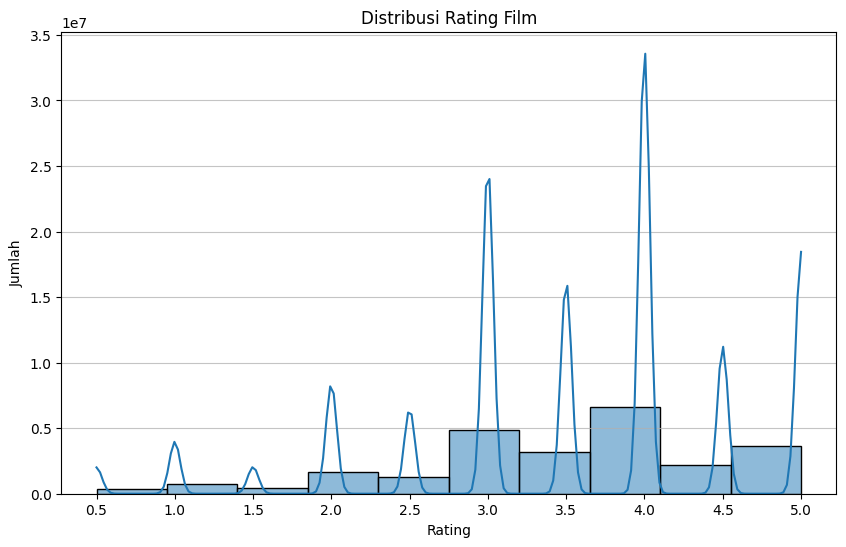

In [37]:
# Memahami bagaimana rating didistribusikan (misalnya, apakah ada banyak rating 0.5 atau 5.0)
plt.figure(figsize=(10, 6))
sns.histplot(ratings['rating'], bins=10, kde=True)
plt.title('Distribusi Rating Film')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.xticks(sorted(ratings['rating'].unique())) # Menampilkan semua nilai rating yang unik
plt.grid(axis='y', alpha=0.75)
plt.show()


Jumlah Rating per Pengguna

In [38]:
movie_rating_counts = ratings['movieId'].value_counts()
print("\nStatistik Deskriptif untuk Jumlah Rating yang Diterima per Film:")
print(movie_rating_counts.describe())


Statistik Deskriptif untuk Jumlah Rating yang Diterima per Film:
count    59047.000000
mean       423.393144
std       2477.885821
min          1.000000
25%          2.000000
50%          6.000000
75%         36.000000
max      81491.000000
Name: count, dtype: float64


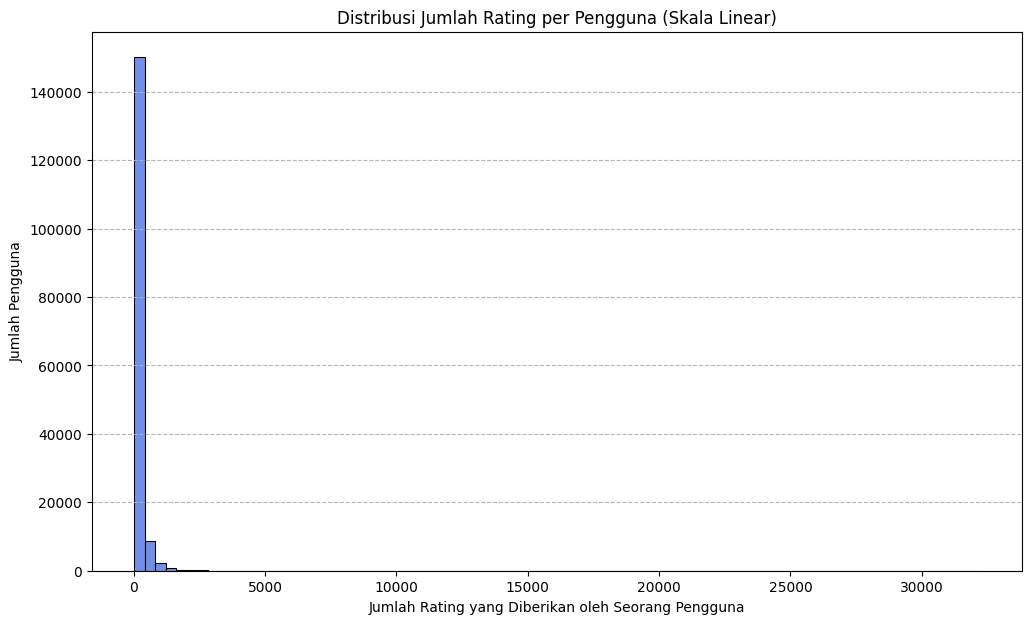

In [39]:
# Menghitung berapa kali setiap pengguna memberikan rating
user_rating_counts = ratings['userId'].value_counts()

plt.figure(figsize=(12, 7))
sns.histplot(user_rating_counts, bins=80, color='royalblue')

plt.title('Distribusi Jumlah Rating per Pengguna (Skala Linear)')
plt.xlabel('Jumlah Rating yang Diberikan oleh Seorang Pengguna')
plt.ylabel('Jumlah Pengguna')
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.show()

Jumlah Rating Per Film

In [40]:
movie_rating_counts = ratings['movieId'].value_counts()

print("\n--- Statistik Deskriptif Jumlah Rating per Film ---")
print(movie_rating_counts.describe())


--- Statistik Deskriptif Jumlah Rating per Film ---
count    59047.000000
mean       423.393144
std       2477.885821
min          1.000000
25%          2.000000
50%          6.000000
75%         36.000000
max      81491.000000
Name: count, dtype: float64


In [41]:

movie_rating_counts_df = pd.DataFrame(movie_rating_counts)
movie_rating_counts_df = movie_rating_counts_df.reset_index()
movie_rating_counts_df.columns = ['movieId', 'rating_count']
top_10_movies = movie_rating_counts_df.merge(movies, on='movieId').head(10)

print("\n--- Top 10 Film Paling Banyak Diberi Rating ---")
print(top_10_movies[['title', 'rating_count', 'genres']])



--- Top 10 Film Paling Banyak Diberi Rating ---
                                       title  rating_count  \
0                        Forrest Gump (1994)         81491   
1           Shawshank Redemption, The (1994)         81482   
2                        Pulp Fiction (1994)         79672   
3           Silence of the Lambs, The (1991)         74127   
4                         Matrix, The (1999)         72674   
5  Star Wars: Episode IV - A New Hope (1977)         68717   
6                       Jurassic Park (1993)         64144   
7                    Schindler's List (1993)         60411   
8                          Braveheart (1995)         59184   
9                          Fight Club (1999)         58773   

                             genres  
0          Comedy|Drama|Romance|War  
1                       Crime|Drama  
2       Comedy|Crime|Drama|Thriller  
3             Crime|Horror|Thriller  
4            Action|Sci-Fi|Thriller  
5           Action|Adventure|Sci-Fi  
6 

C:\Users\faish\AppData\Local\Temp\ipykernel_12804\1581004529.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating_count', y='title', data=top_10_movies, palette='viridis')


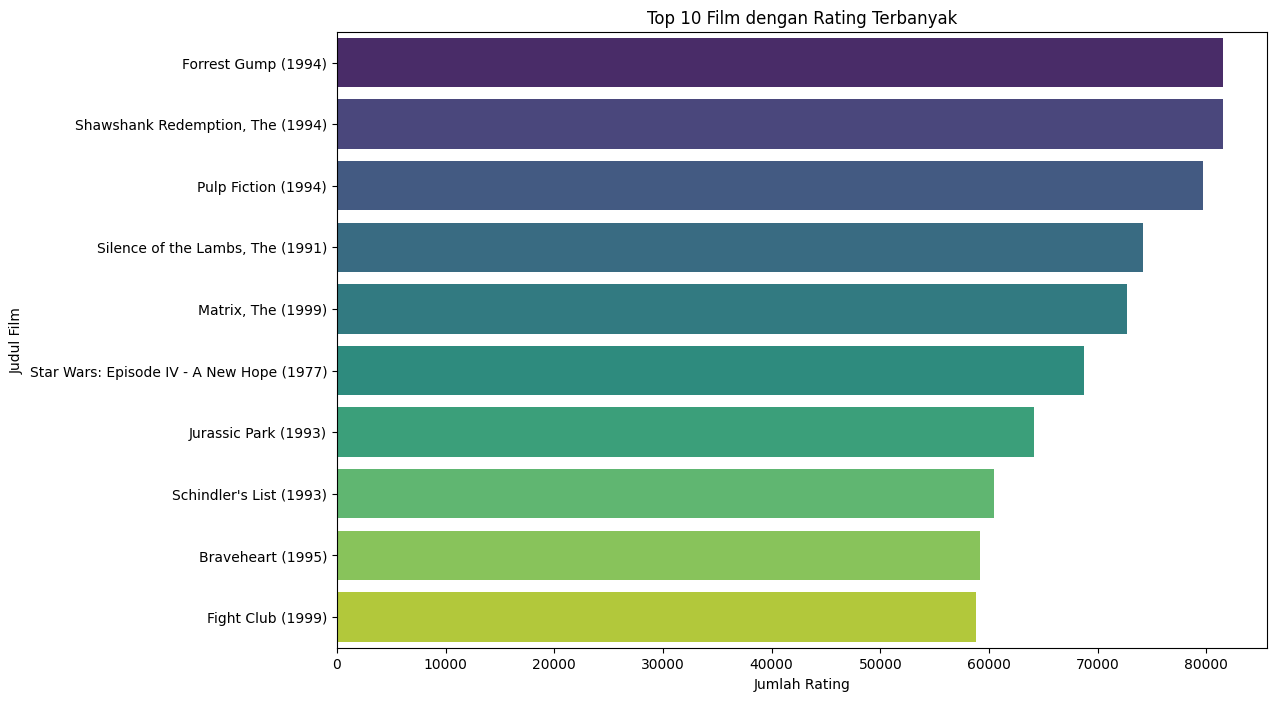

In [42]:
plt.figure(figsize=(12, 8))
sns.barplot(x='rating_count', y='title', data=top_10_movies, palette='viridis')
plt.title('Top 10 Film dengan Rating Terbanyak')
plt.xlabel('Jumlah Rating')
plt.ylabel('Judul Film')
plt.show()


# **Persiapan Data**

### Cek Outlier

Cek Outlier pada Movies

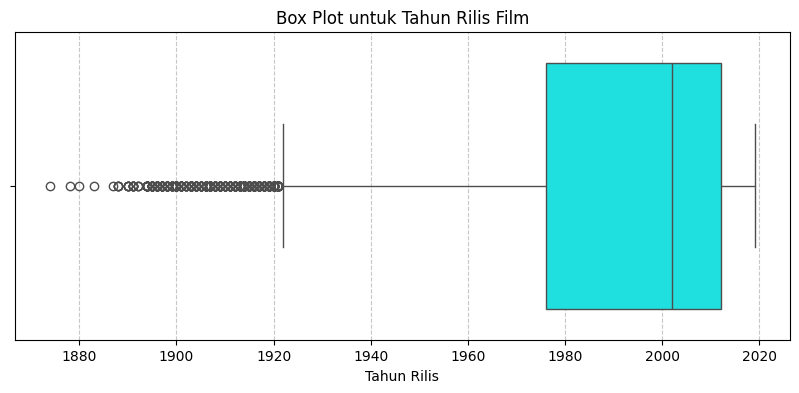

In [43]:
# Membuat kolom 'release_year' jika belum ada
if 'release_year' not in movies.columns:
    movies['release_year'] = movies['title'].str.extract(r'\((\d{4})\)').astype(float)

# Membuat Box Plot untuk mendeteksi outlier
plt.figure(figsize=(10, 4))
sns.boxplot(x=movies['release_year'], color='cyan')
plt.title('Box Plot untuk Tahun Rilis Film')
plt.xlabel('Tahun Rilis')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Hasil dan Analisis:<br>
Visualisasi box plot akan menunjukkan beberapa titik di sisi kiri, yang merupakan film-film yang dirilis sebelum tahun 1900.

Kesimpulan: Titik-titik ini adalah outlier statistik, tetapi bukan data yang salah. Ini adalah film-film historis yang valid. Untuk pembuatan model rekomendasi, data ini tidak perlu dihapus, namun kita perlu sadar akan keberadaannya.

### Penggabungan Dataset

Code dibawah ini berfungsi untuk melakukan merge dataset berdasarkan MOVIE ID


In [44]:

# Menggabungkan kedua dataframe berdasarkan 'movieId'
merged_df = pd.merge(ratings, movies, on='movieId')

# Menampilkan 5 baris pertama dari dataframe yang sudah digabungkan
print("Tampilan dataset gabungan:")
print(merged_df.head())

# Menampilkan ukuran dataframe baru
print(f"\nBentuk dataset gabungan: {merged_df.shape}")
print(f"Bentuk dataset ratings asli: {ratings.shape}")

Tampilan dataset gabungan:
   userId  movieId  rating   timestamp  \
0       1      296     5.0  1147880044   
1       1      306     3.5  1147868817   
2       1      307     5.0  1147868828   
3       1      665     5.0  1147878820   
4       1      899     3.5  1147868510   

                                              title  \
0                               Pulp Fiction (1994)   
1  Three Colors: Red (Trois couleurs: Rouge) (1994)   
2  Three Colors: Blue (Trois couleurs: Bleu) (1993)   
3                                Underground (1995)   
4                        Singin' in the Rain (1952)   

                        genres  release_year  
0  Comedy|Crime|Drama|Thriller        1994.0  
1                        Drama        1994.0  
2                        Drama        1993.0  
3             Comedy|Drama|War        1995.0  
4       Comedy|Musical|Romance        1952.0  

Bentuk dataset gabungan: (25000095, 7)
Bentuk dataset ratings asli: (25000095, 4)


In [45]:
print(merged_df.info())
print(merged_df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 7 columns):
 #   Column        Dtype  
---  ------        -----  
 0   userId        int64  
 1   movieId       int64  
 2   rating        float64
 3   timestamp     int64  
 4   title         object 
 5   genres        object 
 6   release_year  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 1.3+ GB
None
              userId       movieId        rating     timestamp  \
count   2.500010e+07  2.500010e+07  2.500010e+07  2.500010e+07   
unique           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN   
mean    8.118928e+04  2.138798e+04  3.533854e+00  1.215601e+09   
std     4.679172e+04  3.919886e+04  1.060744e+00  2.268758e+08   
min     1.000000e+00  1.000000e+00  5.000000e-01  7.896520e+08   
25%     4.051000e+04  1.196000e+03  3.000000e+00

# **Model Development** 

Import Library

In [46]:
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer

## Content Based Filtering

1. Persiapan Data Genre

In [47]:

# Membersihkan kolom genre, mengganti '|' dengan spasi agar setiap genre bisa di-vektorisasi
movies['genres_cleaned'] = movies['genres'].str.replace('|', ' ', regex=False)

2. Ekstraksi Fitur dengan TF-IDF

In [48]:
# Mengubah teks genre menjadi matriks numerik
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['genres_cleaned'])


3. Membuat Modul Get Movie Recommendation

In [49]:

# Membuat pemetaan dari judul film ke indeks dataframe untuk pencarian yang lebih cepat
indices = pd.Series(movies.index, index=movies['title']).drop_duplicates()


def get_recommendations_flexible(keyword, tfidf_matrix=tfidf_matrix, top_n=10):
    """
    Fungsi ini mencari film berdasarkan kata kunci, lalu memberikan rekomendasi.
    """
    # Cari judul yang cocok dengan kata kunci (tidak case-sensitive)
    matching_titles = movies[movies['title'].str.contains(keyword, case=False)]

    if matching_titles.empty:
        return f"Tidak ada film yang mengandung kata kunci '{keyword}'."

    # Ambil film pertama yang cocok sebagai acuan
    chosen_title = matching_titles.iloc[0]['title']
    print(f"Menemukan film: '{chosen_title}', mencari rekomendasi...")

    # Dapatkan indeks dari film tersebut
    idx = indices[chosen_title]

    # Hitung cosine similarity
    sim_scores = linear_kernel(tfidf_matrix[idx], tfidf_matrix).flatten()
    sim_scores = list(enumerate(sim_scores))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Ambil 10 film paling mirip
    sim_scores = sim_scores[1:top_n+1]
    movie_indices = [i[0] for i in sim_scores]

    return movies['title'].iloc[movie_indices]

Mendapatkan rekomendasi film berdasarkan judul film

In [50]:

# cukup mengetik kata kunci utamanya saja
title = 'Shawshank redemption'
recommendations_flex = get_recommendations_flexible(title)

print("\n--- Rekomendasi Film untuk {title} ---")
print(recommendations_flex)

Menemukan film: 'Shawshank Redemption, The (1994)', mencari rekomendasi...

--- Rekomendasi Film untuk {title} ---
29     Shanghai Triad (Yao a yao yao dao waipo qiao) ...
35                               Dead Man Walking (1995)
95                               Hate (Haine, La) (1995)
115                Young Poisoner's Handbook, The (1995)
242                              The Glass Shield (1994)
244                            Heavenly Creatures (1994)
265                                 Little Odessa (1994)
280                              New Jersey Drive (1995)
287                            Once Were Warriors (1994)
314                     Shawshank Redemption, The (1994)
Name: title, dtype: object


## Deep Learning

Import library yang dibutuhkan untuk tahap modeling dengan deep learning

In [51]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense, Dropout
from tensorflow.keras import layers

Persiapan data sebelum training

In [52]:
# --- Encode ID Pengguna dan Film ---
# Mengubah ID unik (userId, movieId) menjadi angka integer berurutan (0, 1, 2, ...)
user_encoder = LabelEncoder()
movie_encoder = LabelEncoder()

merged_df['user_encoded'] = user_encoder.fit_transform(merged_df['userId'])
merged_df['movie_encoded'] = movie_encoder.fit_transform(merged_df['movieId'])

# Mendapatkan jumlah pengguna dan film unik untuk dimensi embedding
n_users = merged_df['user_encoded'].nunique()
n_movies = merged_df['movie_encoded'].nunique()

print(f"Jumlah Pengguna Unik: {n_users}")
print(f"Jumlah Film Unik: {n_movies}")

Jumlah Pengguna Unik: 162541
Jumlah Film Unik: 59047


In [53]:
# --- Normalisasi Rating dan Split Data ---
# Memisahkan fitur (X) dan target (y)
X_user = merged_df['user_encoded'].values
X_movie = merged_df['movie_encoded'].values
y_rating = merged_df['rating'].values

In [54]:
# Normalisasi rating ke skala [0, 1] dengan membaginya dengan nilai rating maksimum (5.0)
y_rating = y_rating / 5.0

Spliting Dataset

In [55]:
# Membagi data menjadi 80% data latih dan 20% data uji
X_user_train, X_user_test, X_movie_train, X_movie_test, y_train, y_test = train_test_split(
    X_user, X_movie, y_rating, test_size=0.2, random_state=42
)

# Inisialisasi MLP

In [56]:

embedding_size = 32 # DIUBAH: dari 50 menjadi 32

# Input dan Lapisan Embedding untuk User
user_input = Input(shape=(1,), name='user_input')
user_embedding = Embedding(input_dim=n_users, output_dim=embedding_size, name='user_embedding')(user_input)
user_vec = Flatten(name='flatten_user')(user_embedding)

# Input dan Lapisan Embedding untuk Movie
movie_input = Input(shape=(1,), name='movie_input')
movie_embedding = Embedding(input_dim=n_movies, output_dim=embedding_size, name='movie_embedding')(movie_input)
movie_vec = Flatten(name='flatten_movie')(movie_embedding)

# Menggabungkan Vektor dan Lapisan MLP
concat = Concatenate()([user_vec, movie_vec])
# 2. Lapisan Dense diperkecil dan dropout bisa disesuaikan/dihapus
dense = Dense(64, activation='relu')(concat) # DIUBAH: dari 128 menjadi 64
dropout = Dropout(0.5)(dense) 
output = Dense(1, activation='sigmoid')(dropout) 

model= Model([user_input, movie_input], output)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

print("--- Arsitektur Model Sederhana ---")
model.summary()

--- Arsitektur Model Sederhana ---
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 movie_input (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 user_embedding (Embedding)     (None, 1, 32)        5201312     ['user_input[0][0]']             
                                                                                                  
 movie_embedding (Embedding)    (None, 1, 32)        1889504     ['movie_input[0][0]']            
                                                           

Training Model

In [57]:
history = model.fit(
    [X_user_train, X_movie_train],
    y_train,
    epochs=3, 
    batch_size=256,
    validation_data=([X_user_test, X_movie_test], y_test)
)

Epoch 1/3
78126/78126 [==============================] - 921s 12ms/step - loss: 0.0302 - mae: 0.1326 - val_loss: 0.0282 - val_mae: 0.1270
Epoch 2/3
78126/78126 [==============================] - 959s 12ms/step - loss: 0.0282 - mae: 0.1275 - val_loss: 0.0275 - val_mae: 0.1256
Epoch 3/3
78126/78126 [==============================] - 963s 12ms/step - loss: 0.0276 - mae: 0.1259 - val_loss: 0.0272 - val_mae: 0.1249


PLOT HASIL TRAINING

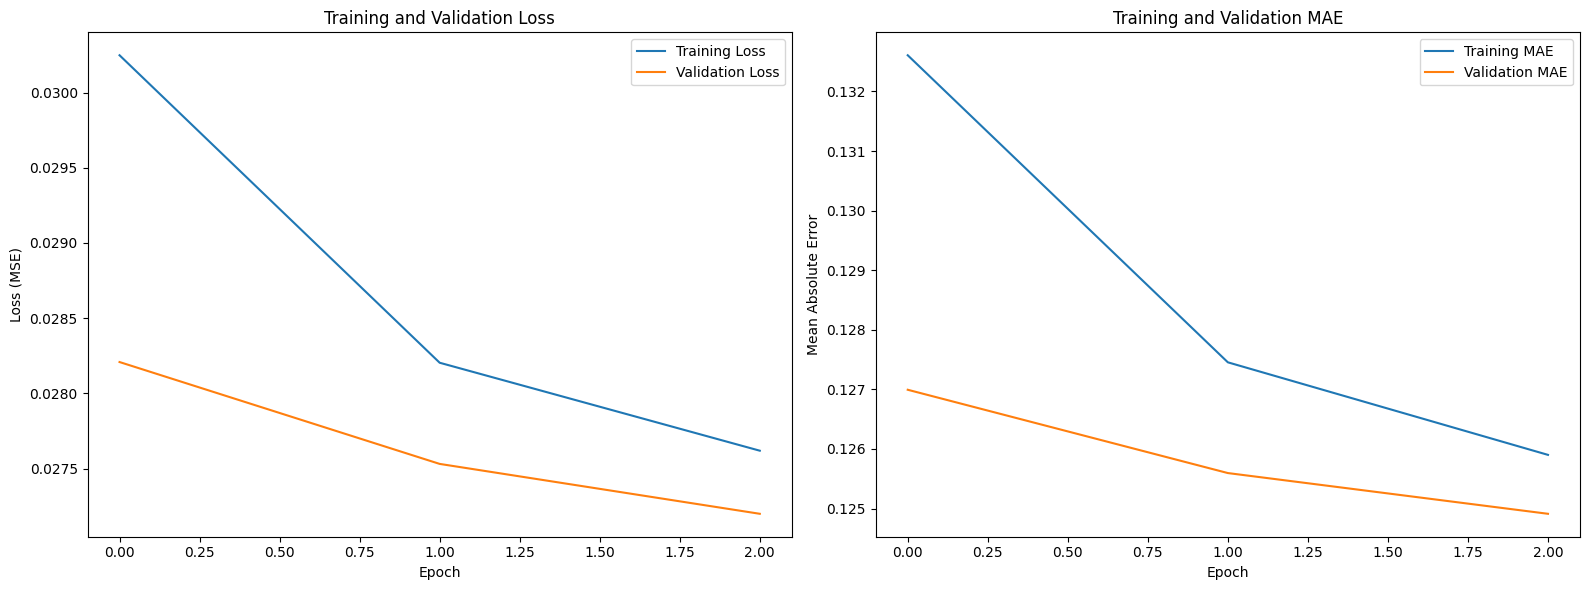

In [58]:
# Membuat plot untuk loss dan mae
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot Training & Validation Loss
axes[0].plot(history.history['loss'], label='Training Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_title('Training and Validation Loss')
axes[0].set_ylabel('Loss (MSE)')
axes[0].set_xlabel('Epoch')
axes[0].legend(loc='upper right')

# Plot Training & Validation MAE
axes[1].plot(history.history['mae'], label='Training MAE')
axes[1].plot(history.history['val_mae'], label='Validation MAE')
axes[1].set_title('Training and Validation MAE')
axes[1].set_ylabel('Mean Absolute Error')
axes[1].set_xlabel('Epoch')
axes[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

Save Model 

In [59]:
# save model
model.save('models/movie_recommendation_model.h5')


Inisialisasi Fungsi untuk melakukan rekomendasi buku

In [60]:

# --- LANGKAH 1: LOAD MODEL YANG TELAH DISIMPAN ---
# Pastikan nama file 'movie_recommendation_dl.h5' sesuai dengan nama file yang Anda simpan.
try:
    model = tf.keras.models.load_model('models/movie_recommendation_model.h5')
    print("Model berhasil dimuat dari file.")
except Exception as e:
    print(f"Error saat memuat model: {e}")
    print("Pastikan Anda sudah melatih dan menyimpan model terlebih dahulu.")
    # Hentikan eksekusi jika model tidak dapat dimuat
    model = None

# --- LANGKAH 2: KODE ANDA UNTUK MENDAPATKAN REKOMENDASI (Tidak Berubah) ---
# Kode ini hanya akan berjalan jika model berhasil dimuat
if model is not None:
    # Definisikan dataframe film dan rating
    movies_df = movies
    df = merged_df

    # Mengambil satu sample user secara acak
    user_id = df.userId.sample(1).iloc[0]
    movies_watched_by_user = df[df.userId == user_id]

    # Membuat daftar film yang BELUM ditonton oleh user
    movies_not_watched = movies_df[~movies_df['movieId'].isin(movies_watched_by_user.movieId.values)]['movieId'] 
    movies_not_watched_list = list(
        set(movies_not_watched)
        .intersection(set(movie_encoder.classes_))
    )

    # Mengubah movieId yang belum ditonton ke dalam format encode
    movies_not_watched_encoded = [[movie_encoder.transform([x])[0]] for x in movies_not_watched_list]
    user_encoder_val = user_encoder.transform([user_id])[0]

    # Membuat array input untuk prediksi
    user_movie_array = np.hstack(
        ([[user_encoder_val]] * len(movies_not_watched_encoded), movies_not_watched_encoded)
    )

    # Memprediksi rating untuk film yang belum ditonton
    ratings = model.predict([user_movie_array[:, 0], user_movie_array[:, 1]]).flatten()

    # Mengambil 10 film dengan prediksi rating tertinggi
    top_ratings_indices = ratings.argsort()[-10:][::-1]
    recommended_movie_ids = [
        movie_encoder.inverse_transform([movies_not_watched_encoded[x][0]])[0] for x in top_ratings_indices
    ]

    # --- Menampilkan Hasil Rekomendasi ---
    print(f'\nMenampilkan rekomendasi untuk user: {user_id}')
    print('===' * 9)
    print('Film dengan rating tinggi dari user (sebagai perbandingan)')
    print('----' * 8)

    top_movies_user = (
        movies_watched_by_user.sort_values(
            by='rating',
            ascending=False
        )
        .head(5)
        .movieId.values
    )

    movie_df_rows = movies_df[movies_df['movieId'].isin(top_movies_user)]
    for row in movie_df_rows.itertuples():
        print(row.title, ':', row.genres)

    print('----' * 8)
    print('Top 10 Rekomendasi Film')
    print('----' * 8)

    recommended_movies = movies_df[movies_df['movieId'].isin(recommended_movie_ids)]
    for row in recommended_movies.itertuples():
        print(row.title, ':', row.genres)

Model berhasil dimuat dari file.
1834/1834 [==============================] - 4s 2ms/step

Menampilkan rekomendasi untuk user: 33096
Film dengan rating tinggi dari user (sebagai perbandingan)
--------------------------------
Apocalypse Now (1979) : Action|Drama|War
Star Wars: Episode VI - Return of the Jedi (1983) : Action|Adventure|Sci-Fi
Alien (1979) : Horror|Sci-Fi
Bridge on the River Kwai, The (1957) : Adventure|Drama|War
Catch Me If You Can (2002) : Crime|Drama
--------------------------------
Top 10 Rekomendasi Film
--------------------------------
Godfather, The (1972) : Crime|Drama
Seven Samurai (Shichinin no samurai) (1954) : Action|Adventure|Drama
Decalogue, The (Dekalog) (1989) : Crime|Drama|Romance
Century of the Self, The (2002) : Documentary
Duck Amuck (1953) : Animation|Children|Comedy
Planet Earth (2006) : Documentary
Over the Garden Wall (2013) : Adventure|Animation|Drama
Planet Earth II (2016) : Documentary
Cosmos : (no genres listed)
Twin Peaks (1989) : Drama|Mystery

# **Evaluasi Model**

## Evaluasi Content-Based Filtering

### 📊 **Evaluasi Model Rekomendasi (Content-Based Filtering)**

Dalam sistem rekomendasi ini, pendekatan **Content-Based Filtering** digunakan untuk memprediksi seberapa cocok suatu film untuk seorang pengguna berdasarkan informasi konten (fitur film) dan preferensi pengguna. Evaluasi performa model dilakukan dengan dua metrik utama:

#### ✅ Precision@K
Mengukur **proporsi film relevan** di antara **top-K film** yang direkomendasikan kepada pengguna.  
Artinya: dari K film teratas yang disarankan sistem, berapa banyak yang benar-benar sesuai preferensi pengguna.

#### 🔍 Recall@K
Mengukur **seberapa banyak film relevan yang berhasil direkomendasikan** dibandingkan dengan seluruh film yang sebenarnya relevan bagi pengguna.  
Artinya: seberapa efektif sistem dalam menangkap seluruh film yang disukai pengguna.

#### ⚙️ Cara Penghitungan:
- Model menghasilkan prediksi rating yang telah **dinormalisasi** ke dalam rentang [0, 1].
- Sebuah film dianggap **relevan** jika rating prediksinya **di atas threshold**, misalnya 0.5.
- Fungsi evaluasi akan:
- Mengelompokkan hasil prediksi berdasarkan pengguna.
- Mengambil **top-K** prediksi tertinggi untuk tiap pengguna.
- Menghitung Precision@K dan Recall@K berdasarkan jumlah item relevan di antara top-K tersebut.
- Evaluasi dilakukan untuk seluruh pengguna, dan rata-rata dari nilai Precision@K dan Recall@K digunakan sebagai indikator performa sistem.


In [61]:
import pandas as pd
import numpy as np
from tqdm import tqdm

def calculate_metrics_for_group(group, k=10, threshold=0.8):
    """
    Fungsi ini menghitung precision dan recall untuk satu grup pengguna.
    """
    # Urutkan berdasarkan prediksi rating tertinggi
    group = group.sort_values(by='pred_rating', ascending=False)

    # Ambil top-k item yang direkomendasikan
    top_k = group.head(k)

    # Hitung jumlah item relevan yang direkomendasikan
    n_relevant_and_recommended = top_k[top_k['true_rating'] >= threshold].shape[0]

    # Hitung jumlah total item yang relevan di seluruh data uji untuk pengguna ini
    n_total_relevant = group[group['true_rating'] >= threshold].shape[0]

    # Hitung precision dan recall
    precision = n_relevant_and_recommended / k
    recall = n_relevant_and_recommended / n_total_relevant if n_total_relevant != 0 else 0

    return pd.Series({'precision': precision, 'recall': recall})

# --- Proses Evaluasi Utama ---

# 1. Dapatkan prediksi dari model (langkah ini tetap sama)
predictions = model.predict([X_user_test, X_movie_test], batch_size=256).flatten()

# 2. Buat DataFrame dari hasil prediksi dan data uji
test_df = pd.DataFrame({
    'user_encoded': X_user_test,
    'movie_encoded': X_movie_test,
    'true_rating': y_test,
    'pred_rating': predictions
})

# 3. Kelompokkan berdasarkan user dan terapkan fungsi metrik
# Menambahkan progress bar dengan tqdm
tqdm.pandas(desc="Evaluating with Pandas")
results_df = test_df.groupby('user_encoded').progress_apply(calculate_metrics_for_group)

# 4. Hitung rata-rata hasil akhir
average_precision = results_df['precision'].mean()
average_recall = results_df['recall'].mean()

k = 10
print(f"\nAverage Precision@{k}: {average_precision:.4f}")
print(f"Average Recall@{k}: {average_recall:.4f}")

19532/19532 [==============================] - 48s 2ms/step


Evaluating with Pandas: 100%|█████████▉| 162324/162342 [06:02<00:00, 871.73it/s] c:\Users\faish\anaconda3\envs\klasifikasinyo\lib\site-packages\tqdm\std.py:917: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return getattr(df, df_function)(wrapper, **kwargs)
Evaluating with Pandas: 100%|██████████| 162342/162342 [06:07<00:00, 441.16it/s]


Average Precision@10: 0.5836
Average Recall@10: 0.6853


## Evaluasi Model Deep Learning Based

### 🤖 **Evaluasi Model Deep Learning dengan MAE**

Model deep learning dalam proyek ini digunakan untuk memprediksi rating pengguna terhadap item (misalnya buku atau film) berdasarkan pola dan representasi yang dipelajari dari data. Untuk mengevaluasi performanya, digunakan metrik **Mean Absolute Error (MAE)**.

#### 🎯 Mengapa MAE?
- **MAE (Mean Absolute Error)** mengukur **rata-rata selisih absolut** antara nilai prediksi dan nilai aktual.
- MAE memberikan gambaran yang **mudah diinterpretasikan**, karena hasilnya berada dalam satuan yang sama dengan target (yaitu skala rating).
- Pada prediksi rating yang memiliki rentang nilai terbatas (misalnya 0–10), MAE menjadi pilihan yang **stabil dan tidak terlalu sensitif terhadap outlier**, berbeda dengan MSE (Mean Squared Error) yang memperbesar pengaruh kesalahan besar.
- MAE cocok dalam konteks **sistem rekomendasi berbasis rating**, karena fokus pada seberapa dekat prediksi dengan rating sebenarnya, tanpa memberikan penalti besar untuk error ekstrem.

#### 🧮 Interpretasi:
Jika MAE = 0.5, artinya secara rata-rata model melakukan kesalahan sebesar **0.5 poin rating** pada setiap prediksi. Ini memudahkan pengguna maupun pengembang dalam memahami kualitas prediksi model.

#### 📌 Catatan:
- MAE digunakan selama proses pelatihan dan evaluasi akhir.
- Metrik ini juga bisa dibandingkan antar model untuk memilih arsitektur yang paling andal dalam memberikan prediksi yang akurat.


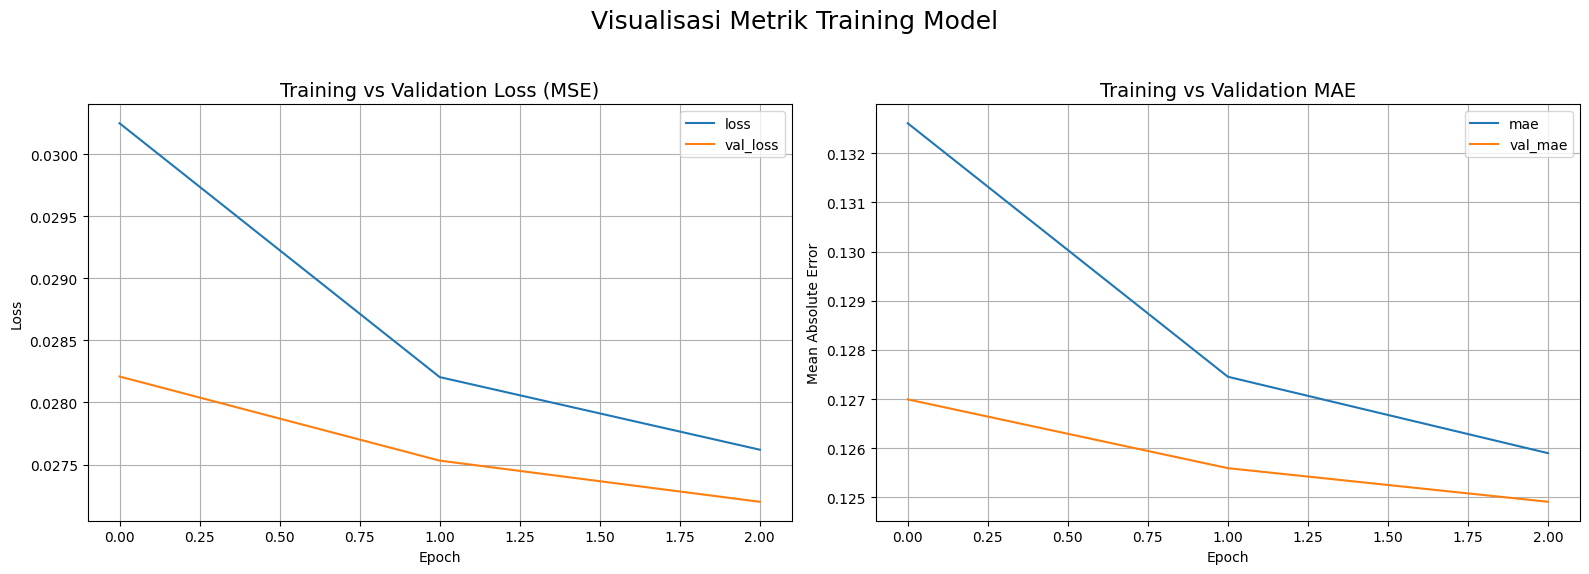

In [62]:
# 1. Ubah dictionary history menjadi DataFrame Pandas untuk kemudahan plotting
history_df = pd.DataFrame(history.history)

# Menambahkan kolom 'epoch' untuk digunakan sebagai sumbu-X
# Index dari DataFrame sudah merepresentasikan epoch, dimulai dari 0
history_df.index.name = 'Epoch'

# 2. Buat visualisasi menggunakan fungsi plot dari DataFrame
# Kita akan membuat 2 subplot dalam satu gambar (figure)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot untuk Loss (Training vs Validation) pada sumbu pertama (axes[0])
history_df[['loss', 'val_loss']].plot(ax=axes[0])
axes[0].set_title('Training vs Validation Loss (MSE)', fontsize=14)
axes[0].set_ylabel('Loss')
axes[0].grid(True)

# Plot untuk MAE (Training vs Validation) pada sumbu kedua (axes[1])
history_df[['mae', 'val_mae']].plot(ax=axes[1])
axes[1].set_title('Training vs Validation MAE', fontsize=14)
axes[1].set_ylabel('Mean Absolute Error')
axes[1].grid(True)

# Memberikan judul utama untuk keseluruhan gambar
plt.suptitle('Visualisasi Metrik Training Model', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Menyesuaikan layout agar judul utama tidak tumpang tindih
plt.show()

In [63]:
history_df = pd.DataFrame(history.history)
final_metrics = history_df.iloc[-1]
print("--- Hasil Evaluasi Epoch Terakhir ---")
print(final_metrics)

--- Hasil Evaluasi Epoch Terakhir ---
loss        0.027619
mae         0.125901
val_loss    0.027200
val_mae     0.124912
Name: 2, dtype: float64
